<a href="https://colab.research.google.com/github/lisaxwu/cs230-tailorship/blob/main/CS230_final_tailorship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Tailorship

## 1. Prepare Env and Input

In [3]:
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd /content/drive/MyDrive/tailorship
!ls

/content/drive/MyDrive/tailorship
dreambooth-11-15  lora-11-14		 __pycache__		  text2image_lora.py
images		  lora-11-15-20epochs	 results		  train_dreambooth_lora.py
image_scraper.py  lora-dreambooth-model  sd-model-finetuned-lora
lora-11-13	  myenv			 StableVITON


In [6]:
!pip install virtualenv
!virtualenv myenv

# !pip install "jax[cuda12_local]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
# !pip install --upgrade diffusers
!pip install scipy ftfy accelerate
!pip install matplotlib
!pip install ipython
!pip install requests beautifulsoup4 selenium
!pip install pillow
!pip install datasets peft numpy huggingface_hub
!pip install torch torchvision torchaudio
!pip install diffusers transformers

!pip install pytorch-lightning
!pip install einops
!pip install opencv-python
!pip install omegaconf
!pip install albumentations
!pip install xformers
!pip install triton
!pip install open-clip-torch
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 39.6 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 27138ms
  creator CPython3Posix(dest=/content/drive/MyDrive/tailorship/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.2.0, wheel==0.44.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.0 MB/s eta 0:00:00


In [8]:
import torch
import torchvision
import diffusers

print("Torch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("Diffusers version:", diffusers.__version__)

Torch version: 2.5.1+cu121
Torchvision version: 0.20.1+cu121
Diffusers version: 0.31.0


## 2. Try base diffusers (v1.5)

In [12]:
from diffusers import DiffusionPipeline
import torch
from IPython import display

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipeline.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

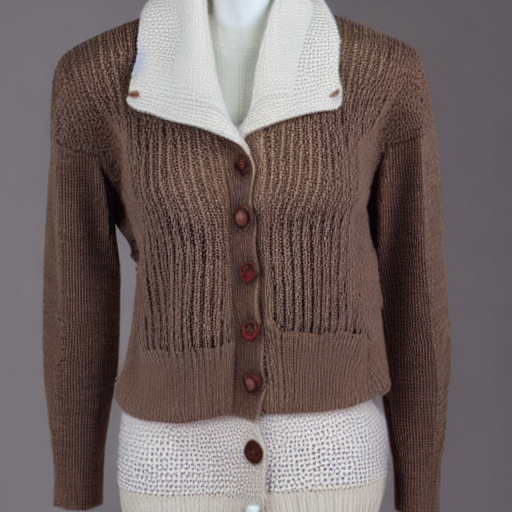

In [19]:
image = pipeline("A women's cardigan on a mannequin with white wood stand").images[0]
image

## 3. Scrape & Caption Image Data

In [ ]:
! python3 image_scraper.py --limit=300 --query="cardigan" --folder="./images/train/cardigan/"

Scraping images from website:  https://www.wconcept.com/search/result.html?sort=popular&query=cardigan&sale=&cfo=categories&offset=0&limit=80 


Traceback (most recent call last):
  File "/content/drive/MyDrive/tailorship/image_scraper.py", line 97, in <module>
    ScrapeImages(query=args.query, limit=args.limit, folder=args.folder)
  File "/content/drive/MyDrive/tailorship/image_scraper.py", line 55, in ScrapeImages
    driver = webdriver.Chrome(service=service, options=options)
  File "/usr/local/lib/python3.10/dist-packages/selenium/webdriver/chrome/webdriver.py", line 45, in __init__
    super().__init__(
  File "/usr/local/lib/python3.10/dist-packages/selenium/webdriver/chromium/webdriver.py", line 66, in __init__
    super().__init__(command_executor=executor, options=options)
  File "/usr/local/lib/python3.10/dist-packages/selenium/webdriver/remote/webdriver.py", line 238, in __init__
    self.start_session(capabilities)
  File "/usr/local/lib/python3.10/dist-packages/selenium/w

In [35]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
from os import listdir
from os.path import isfile, join

# Load model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

dirname = "./images/train/blouse"
all_images = [f for f in listdir(dirname) if isfile(join(dirname, f))]

for f in all_images:
    image = Image.open(join(dirname, f))
    inputs = processor(images=image, return_tensors="pt")
    # Generate a caption
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    print("%s, %s" % (f, caption))

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


720293466_1.png, a woman in a black suit and blue shirt
720326297_1.png, the black silk top is a simple, yet - fitting top with a ru - up front
720174547_1.png, a woman standing on a rock in the woods
720217582_1.png, a woman sitting in a chair wearing a striped shirt
720138668_1.png, a woman wearing a white blouse and jeans
720204144_1.png, a woman wearing a black top and jeans
720238293_1.png, a woman in a white blouse and tan pants
720324796_1.png, a woman in a green shirt and green pants
720181030_1.png, a woman in a white shirt and blue skirt
720282050_1.png, a woman wearing a brown shirt and black pants
720159841_1.png, a woman in white top and shorts
720333451_1.png, a woman wearing a white shirt and black skirt
720251298_1.png, a woman in a black dress standing against a wall
720141089_1.png, a woman standing in front of a white wall
720266351_1.png, the back of a woman wearing a black top with a v - neckline
720178354_1.png, a woman in a white shirt and black skirt
720231536_1

## 4. Train Text2Image LoRA

---



### 4.1 Train LoRA

In [6]:
! python3 text2image_lora.py --train_mode="true" --num_train_epochs=20 --pretrained_model_name_or_path="stable-diffusion-v1-5/stable-diffusion-v1-5"

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
2024-11-16 09:23:01.305999: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 09:23:01.323050: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-16 09:23:01.344665: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-16 09:23:01.351546: E exte

## 5. Train DreamBooth LoRA

### 5.1 Train

In [8]:
! python3 train_dreambooth_lora.py --train_text_encoder --num_train_epochs=20 --pretrained_model_name_or_path="stable-diffusion-v1-5/stable-diffusion-v1-5" \
  --instance_data_dir="./images" --instance_prompt="A women's cloth" --learning_rate=2e-5 --train_batch_size=16

2024-11-17 02:13:17.221254: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 02:13:17.238151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 02:13:17.259263: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-17 02:13:17.265614: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 02:13:17.281040: I tensorflow/core/platform/cpu_feature_guar

## 6. Test Models

In [12]:
import torch
import torchvision
from accelerate import Accelerator
from pathlib import Path
from accelerate.utils import ProjectConfiguration
import diffusers
from diffusers import DiffusionPipeline
import matplotlib.pyplot as plt
import datetime
import os

base_pipeline = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    revision=None,
    variant=None,
    torch_dtype=torch.float32,
    safety_checker = None,
)

lora_pipeline = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    revision=None,
    variant=None,
    torch_dtype=torch.float32,
    safety_checker = None,
)
output_dir = "sd-model-finetuned-lora"
lora_pipeline.load_lora_weights(output_dir)

dreambooth_lora_pipeline = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    revision=None,
    variant=None,
    torch_dtype=torch.float32,
    safety_checker = None,
)
output_dir = "lora-dreambooth-model"
dreambooth_lora_pipeline.load_lora_weights(output_dir)

from diffusers import AutoPipelineForImage2Image
img2img_pipeline = AutoPipelineForImage2Image.from_pretrained("runwayml/stable-diffusion-v1-5")

base_pipeline = base_pipeline.to("cuda")
base_pipeline.set_progress_bar_config(disable=True)

lora_pipeline = lora_pipeline.to("cuda")
lora_pipeline.set_progress_bar_config(disable=True)

dreambooth_lora_pipeline = dreambooth_lora_pipeline.to("cuda")
dreambooth_lora_pipeline.set_progress_bar_config(disable=True)

img2img_pipeline = img2img_pipeline.to("cuda")
img2img_pipeline.set_progress_bar_config(disable=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Prompt: a women's cardigan
LoRA finetuned images


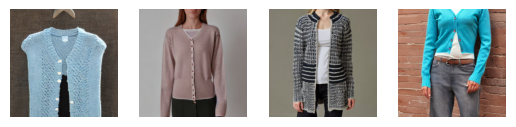

base model images


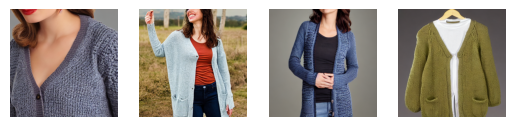

In [19]:
now = datetime.datetime.now()
now_time_str = now.strftime("%Y-%m-%d_%H:%M:%S")
filename = (now_time_str + "_%d.png")

prompt = "a women's cardigan"
print("Prompt: %s" % (prompt))
save_images = True

# print("Dreambooth-LoRA finetuned images")
# fig, axes = plt.subplots(1, 4)
# for i, ax in enumerate(axes.flat):
#   image = dreambooth_lora_pipeline(prompt, num_inference_steps=30).images[0]
#   if save_images:
#     image.save('results/dreambooth/' + (filename % i))
#   ax.imshow(image)
#   ax.axis('off')
# plt.show()

print("LoRA finetuned images")
fig, axes = plt.subplots(1, 4)
for i, ax in enumerate(axes.flat):
  image = lora_pipeline(prompt, num_inference_steps=30).images[0]
  if save_images:
    image.save('results/lora/' + (filename % i))
  ax.imshow(image)
  ax.axis('off')
plt.show()

print("base model images")
fig, axes = plt.subplots(1, 4)
for i, ax in enumerate(axes.flat):
  image = base_pipeline(prompt, num_inference_steps=30).images[0]
  if save_images:
    image.save('results/base/' + (filename % i))
  ax.imshow(image)
  ax.axis('off')
plt.show()


# print("Dreambooth-LoRA finetuned image result + img2img result")
# fig, axes = plt.subplots(1, 2)
# image = None
# for i, ax in enumerate(axes.flat):
#   if image is None:
#     image = dreambooth_lora_pipeline(prompt, num_inference_steps=30).images[0]
#   else:
#     image = img2img_pipeline("a blouse on the tailor's mannequin", image).images[0]
#   ax.imshow(image)
#   ax.axis('off')
# plt.show()